# Homework 7 (50 points)

In this Homework, we will try to classify observations of space to be either stars, galaxies or quasars based on the RD14 from the Sloan Digital Sky Survey  (SDSS). The Sloan Digital Sky Survey is a project which offers public data of space observations. Observations have been made since 1998 and have been made accessible to everyone who is interested. 

http://www.sdss.org/
![alt text](http://www.fingerprintdigitalmedia.com/wp-content/uploads/2014/08/sdss1.jpg)

For this purpose a special 2.5 m diameter telescope was built at the Apache Point Observatory in New Mexico, USA. The telescope uses a camera of 30 CCD-Chips with 2048x2048 image points each. The chips are ordered in 5 rows with 6 chips in each row. Each row observes the space through different optical filters (u, g, r, i, z) at wavelengths of approximately 354, 476, 628, 769, 925 nm.


In this homework we will train several classifier to predict the class of a celestial object based on the observations (features). We will practice data prep, dimensionality reduction, model design and training, model comparison, and feature importance selection.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline


## 1) Data Preparation (20 points)

We follow the following steps:
* read (1 point)
* clean (3 points)
* correlate (4 points)
* explore, spread of values (3 points)
* dimensionality reduction (9 points)

### 1.1 Data read
Read the pandas fata frame from the csv file "Skyserver_SQL2_27_2018.csv" and skip the first row.

**Task: read (1 point)**

Save a copy of the data frame just in case.

In [2]:
# answer
t_path = pd.read_csv("../MLGeo-Autumn22/homework/Skyserver_SQL2_27_2018.csv", skiprows=[1])


**Description of the data fields**

* objid = Object Identifier, self explanatory.
* ra = J2000 Right Ascension (r-band). Angular that is measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question.   https://en.wikipedia.org/wiki/Right_ascension
* dec = J2000 Declination (r-band). Angle that is measured north or south of the celestial equator, along the hour circle passing through the point in question. https://en.wikipedia.org/wiki/Declination



The Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

Further Information: http://astroweb.case.edu/ssm/ASTR620/mags.html 
* u = better of DeV/Exp magnitude fit
* g = better of DeV/Exp magnitude fit
* r = better of DeV/Exp magnitude fit
* i = better of DeV/Exp magnitude fit
* z = better of DeV/Exp magnitude fit




Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. 
* run = Run Number, which identifies the specific scan. 
* rereun = Rerun Number, which specifies how the image was processed.
* camcol = Camera column, a number from 1 to 6, identifying the scanline within the run.
* field = Field number, which typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
* specobjid = Object Identifier
* class = object class (galaxy, star or quasar object): The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

* redshift = Final Redshift: In physics, **redshift** happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum. 

* plate = plate number: Each spectroscopic exposure employs a large, thin, circular metal **plate** that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

* mjd = MJD of observation, **Modified Julian Date**, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.
* fiberid = fiber ID. The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding **fiberID**. 

**Further information on SDSS images and their attributes:** 

http://www.sdss3.org/dr9/imaging/imaging_basics.php

http://www.sdss3.org/dr8/glossary.php

### 1.2 Data Cleaning 

Basic stats about our dataset. 

**Task: Provide basic infor for the pandas dataframe head (0.5 point)**

In [3]:
# head
print(t_path.head)
t_path.describe()

<bound method NDFrame.head of              objid          ra        dec         u         g         r  \
0     1.237650e+18  183.598370   0.135285  18.66280  17.21449  16.67637   
1     1.237650e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
2     1.237650e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
3     1.237650e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
4     1.237650e+18  183.847174   0.173694  19.43133  18.46779  18.16451   
...            ...         ...        ...       ...       ...       ...   
9994  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9995  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9996  1.237650e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9997  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9998  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  rerun  camcol  field     specobjid   

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.0,9999.000000,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000
mean,1.237650e+18,175.529186,14.837623,18.619270,17.371964,16.841053,16.583687,16.422953,981.057706,301.0,3.648665,302.383638,1.644814e+18,0.143740,1460.801880,52943.335434,353.055606
std,0.000000e+00,47.785762,25.213036,0.828653,0.945499,1.067780,1.141811,1.203189,273.309092,0.0,1.666263,162.585508,2.013992e+18,0.388791,1788.772648,1511.096669,206.303853
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.368397,-0.539637,18.178010,16.815060,16.173540,15.853880,15.618620,752.000000,301.0,2.000000,184.000000,3.389245e+17,0.000081,301.000000,51900.000000,186.500000
50%,1.237650e+18,180.393638,0.405248,18.852980,17.495150,16.858920,16.555050,16.389960,756.000000,301.0,4.000000,299.000000,4.966570e+17,0.042592,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.548093,35.678922,19.259150,18.010220,17.512740,17.258570,17.141635,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092581,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


**Task: Find the data types of the database (floats, string, etc etc) using the ``info()`` function (0.5 point).**

In [4]:
# information
t_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      9999 non-null   float64
 1   ra         9999 non-null   float64
 2   dec        9999 non-null   float64
 3   u          9999 non-null   float64
 4   g          9999 non-null   float64
 5   r          9999 non-null   float64
 6   i          9999 non-null   float64
 7   z          9999 non-null   float64
 8   run        9999 non-null   int64  
 9   rerun      9999 non-null   int64  
 10  camcol     9999 non-null   int64  
 11  field      9999 non-null   int64  
 12  specobjid  9999 non-null   float64
 13  class      9999 non-null   object 
 14  redshift   9999 non-null   float64
 15  plate      9999 non-null   int64  
 16  mjd        9999 non-null   int64  
 17  fiberid    9999 non-null   int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Are there any obvious feature (or element of the dataframe) that should not impact our prediction?
 
**objid** and **specobjid** are just identifiers for accessing the rows back when they were stored in the original databank. Therefore we will not need them for classification as they are not related to the outcome.
The features **run**, **rerun**, **camcol** and **field** are values which describe parts of the camera at the moment when making the observation, e.g. 'run' represents the corresponding scan which captured the oject.

Source: http://www.sdss3.org/dr9/imaging/imaging_basics.php

**Task: Drop these columns in the pandas dataframe. (1 point)**

In [5]:
# answer
t_path = t_path.drop(['objid','specobjid','run','rerun','camcol','field'],axis=1)
print(t_path.head)

<bound method NDFrame.head of               ra        dec         u         g         r         i         z  \
0     183.598370   0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
1     183.680207   0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
2     183.870529   0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
3     183.883288   0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   
4     183.847174   0.173694  19.43133  18.46779  18.16451  18.01475  18.04155   
...          ...        ...       ...       ...       ...       ...       ...   
9994  131.316413  51.539547  18.81777  17.47053  16.91508  16.68305  16.50570   
9995  131.306083  51.671341  18.27255  17.43849  17.07692  16.71661  16.69897   
9996  131.552562  51.666986  18.75818  17.77784  17.51872  17.43302  17.42048   
9997  131.477151  51.753068  18.88287  17.91068  17.53152  17.36284  17.13988   
9998  131.665012  51.805307  19.27586  17.37829  16.30542  15.83548  15.50588  

Find our how many examples there are, how many attributes or feature, and the type of class.

In [6]:
# description
t_path.describe()

,ra,dec,u,g,r,i,z,redshift,plate,mjd,fiberid
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,175.529186,14.837623,18.619270,17.371964,16.841053,16.583687,16.422953,0.143740,1460.801880,52943.335434,353.055606
std,47.785762,25.213036,0.828653,0.945499,1.067780,1.141811,1.203189,0.388791,1788.772648,1511.096669,206.303853
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,-0.004136,266.000000,51578.000000,1.000000
25%,157.368397,-0.539637,18.178010,16.815060,16.173540,15.853880,15.618620,0.000081,301.000000,51900.000000,186.500000
50%,180.393638,0.405248,18.852980,17.495150,16.858920,16.555050,16.389960,0.042592,441.000000,51997.000000,351.000000
75%,201.548093,35.678922,19.259150,18.010220,17.512740,17.258570,17.141635,0.092581,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,5.353854,8410.000000,57481.000000,1000.000000


**Task: How many objects are in each class? (1 point)**

In [7]:
# Count the elements in each class
t_path.info()
# Each class has 9999 objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        9999 non-null   float64
 1   dec       9999 non-null   float64
 2   u         9999 non-null   float64
 3   g         9999 non-null   float64
 4   r         9999 non-null   float64
 5   i         9999 non-null   float64
 6   z         9999 non-null   float64
 7   class     9999 non-null   object 
 8   redshift  9999 non-null   float64
 9   plate     9999 non-null   int64  
 10  mjd       9999 non-null   int64  
 11  fiberid   9999 non-null   int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 937.5+ KB


The classes are "GALAXY", "STAR", and "QSO" (quasars). They are defined as strings, but we will convert them to integer in order to apply a loss function on the class labels during training. For this, we use the ``sklearn.preprocessing.LabelEncoder()`` function. We will do so and modify the classes in the dataframe. We should keep a copy of the original data frame to be safe.

In [24]:
sdss_df_save = t_path # make a copy of the original data before cleaning it. That works well when the data is small.
sdss_df = t_path

# encode class labels to integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(sdss_df['class'])
sdss_df['class'] = y_encoded
#  GALAXY = 0
# STAR = 1
# QSO = 2
sdss_df.head

<bound method NDFrame.head of               ra        dec         u         g         r         i         z  \
0     183.598370   0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
1     183.680207   0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
2     183.870529   0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
3     183.883288   0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   
4     183.847174   0.173694  19.43133  18.46779  18.16451  18.01475  18.04155   
...          ...        ...       ...       ...       ...       ...       ...   
9994  131.316413  51.539547  18.81777  17.47053  16.91508  16.68305  16.50570   
9995  131.306083  51.671341  18.27255  17.43849  17.07692  16.71661  16.69897   
9996  131.552562  51.666986  18.75818  17.77784  17.51872  17.43302  17.42048   
9997  131.477151  51.753068  18.88287  17.91068  17.53152  17.36284  17.13988   
9998  131.665012  51.805307  19.27586  17.37829  16.30542  15.83548  15.50588  

### 1.3 Data correlations
Now let's find the most basic correlations among features. This can be done using the ``corr()`` function to apply on the pandas dataframe. Evaluate this function and comment on what feature is correlated among others. It is convenient to use the matplotlib function ``matshow()`` for clarity. ``seaborn`` is a python module that makes really pretty statistical plots https://seaborn.pydata.org/index.html#. Install it with ``pip`` and import it.

In [25]:
import seaborn as sns

**Task: Plot the correlation matrix that can be called in the pandas dataframe. (2 points)**

Hints:

Use functions of ``heatmap``, add the labels in the axes. The colormap ``coolwarm`` is nice for divergent scales like correlations that vary between -1 and 1. The argument ``center=0`` ensures that the colormap is divergent from zero. Make sure to ignore the label column "class". Remember that dropping a column can be done in place ``sdss_df.drop('class', axis=1)``.

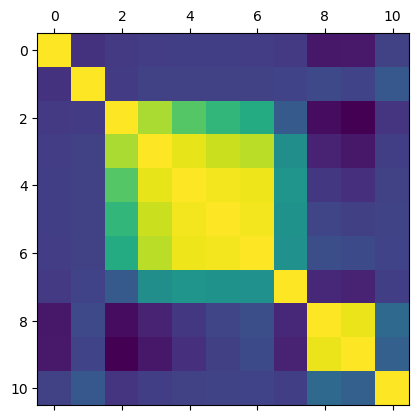

In [26]:
# answer
#sdss_df.corr()
plt.matshow((sdss_df.drop('class', axis=1)).corr())

**Task: Reproduce the same plot for each of the three classes. (1 point)**
You can select the values from the pandas dataframe by selecting over the column 'class'. 

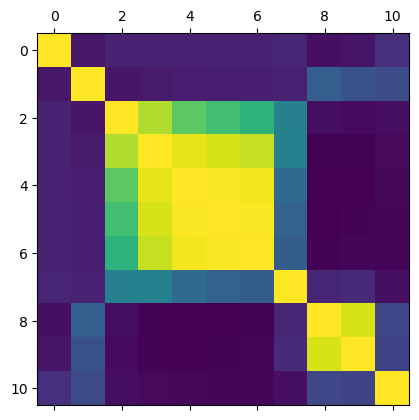

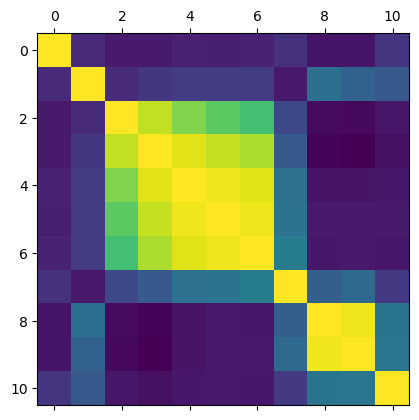

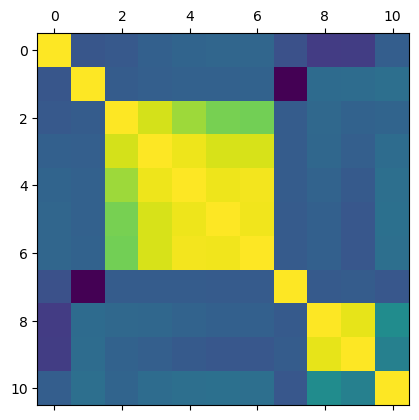

In [27]:
# make the same plot for Galaxies
# "GALAXY" is label 0
galaxy_only = sdss_df.loc[sdss_df['class'] == 0]
plt.matshow((galaxy_only.drop('class',axis=1)).corr())
# Make the same plot for Stars (label 1)
stars_only = sdss_df.loc[sdss_df['class'] == 1]
plt.matshow((stars_only.drop('class',axis=1)).corr())

# make the same plots for quasars (label 2)
quasars_only = sdss_df.loc[sdss_df['class'] == 2]
plt.matshow((quasars_only.drop('class',axis=1)).corr())


**Task: Can you comment on groups of observations that can be grouped together or that appear independent from each other given these correlations, and if there is any difference between the three celestial objects? (**1 point**)**

Galaxies and stars appear to be grouped similarly while quasars seem more independent from the others. They all have similar patterns of yellow and green, but galaxies and stars had darker blues than quasars.

### 1.5 Data exploration
Given the structure of the correlations, we will explore the values of the data.

#### 1.5.a. Distributions of redshift
"redshifting" happens when the source of light is becoming more distant to the receiver: the object is moving away from Earth. 

**Task: plot histograms for the 'redshift' feature column for each class (1 point).**

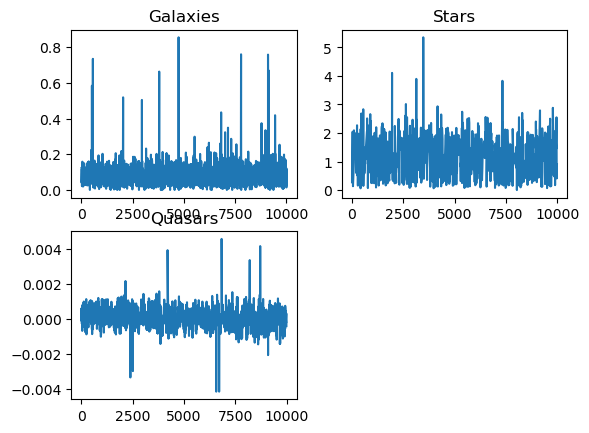

In [28]:
# answer
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax1.title.set_text('Galaxies')
ax1.plot(galaxy_only['redshift'])
ax2.title.set_text('Stars')
ax2.plot(stars_only['redshift'])
ax3.title.set_text('Quasars')
ax3.plot(quasars_only['redshift'])
plt.show()

**Task : Describe briefly the difference between the three histograms. (0.5 point)**

<!-- # answer -->
* **Star:** The histogram looks like a truncated zero-centered normal distribution. It looks like stars are both coming toward and away from the Earth.

* **Galaxy:** The redshift values may come from a slightly right-shifted normal distribution which is centered around 0.075. It looks like galaxies are moving away from the Earth but at slow speeds.

* **QSO:** The redshift values for QSOs are a lot more uniformly distributed than for Stars or Galaxies. They are roughly evenly distributed from 0 to 3, than the occurences decrease drastically. For 4 oder ~5.5 there are some outliers. This probably means that quasards are moving away from the earth with a diverse range of speeds.


#### 1.5.b. Right ascension (ra) and declination (dec) 

We will now plot the right ascension versus the declination depending on the class. You can use the ``lmplot`` function in ``seaborn`` (https://seaborn.pydata.org/generated/seaborn.lmplot.html) to represent the sky view of these objects.

Text(0.5, 1.0, 'Equatorial coordinates')

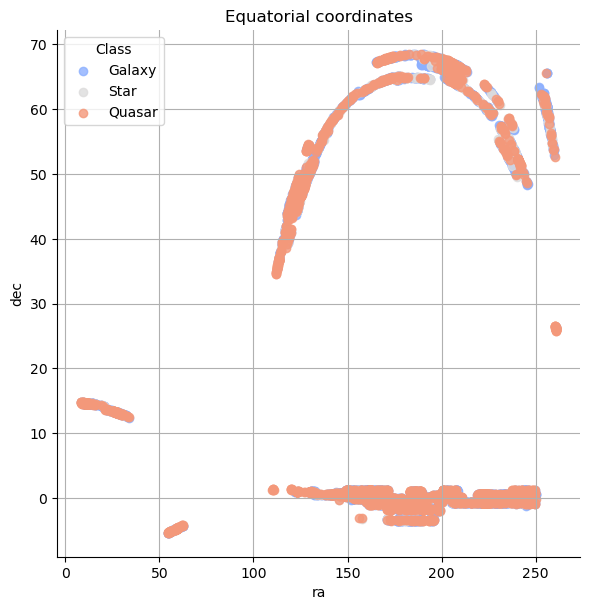

In [29]:
sns.lmplot(x='ra', y='dec', data=sdss_df, hue='class', fit_reg=False, palette='coolwarm', height=6, aspect=1,legend=False)
plt.legend(title='Class', loc='upper left', labels=['Galaxy', 'Star','Quasar'])
plt.grid(True)
plt.title('Equatorial coordinates')

**Task: do you see any obvious differences such that one could easily discriminate between the two coordinates? (0.5 point)**

In [67]:
#The right ascention has a much larger range than the declination, it is more similar to longitude. Declination has a smaller range and is more similar to latitude.

#### 1.5.c Filters - u,g,r,i,z 

Recall: u, g, r, i, z represent the different wavelengths which are used to capture the observations. According to the correlation matrix, they are correlated for all three classes.

Therefore it is interesting to see that band 'u' is less correlated to the other bands. 

**Task: Plot histograms and discuss why you expect these features to be correlated (1 points)**

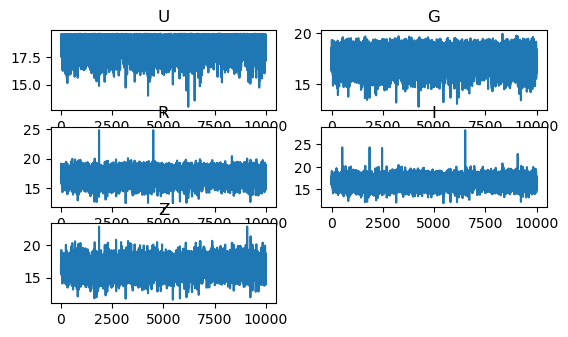

In [30]:
# Plot of histograms
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure()
ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)
ax5 = fig.add_subplot(425)
ax1.title.set_text('U')
ax1.plot(sdss_df['u'])
ax2.title.set_text('G')
ax2.plot(sdss_df['g'])
ax3.title.set_text('R')
ax3.plot(sdss_df['r'])
ax4.title.set_text('I')
ax4.plot(sdss_df['i'])
ax5.title.set_text('Z')
ax5.plot(sdss_df['z'])
plt.show()

<!-- Anwer: -->

### 1.6 Data Dimensionality Reduction
At this point, we are left with 8 features: redshift, u, g, r, i, z, ra, and dec. Among these, the filters (u, g, r, i, z) are correlated to each other. There is therefore a potential for reducing the dimensions of the features using PCA on these 5 features.

We will use the skilearn function ``sklearn.decomposition.PCA()`` to fit and transform the data into the PC coordinates. Lets' first explore how many PCs we need. Fit the PCA function over the total number of filters. You will fit the PCA function over an array with the columns selected from the dataframe. 

**Task: Perform the PCA over a max number of PCs, output the explained variance ratio values, decide on an appropriate maximum number of PC to use (6 points)**

*Answer on how many PCs to use*



In [31]:
# anwer
from sklearn.decomposition import PCA
ugriz = sdss_df[['u','g','r','i','z']]#
T = ugriz.transpose()
print(ugriz.head)

ugriz_mean = np.mean(T,axis=1)
X = ugriz - np.tile(ugriz_mean,(sdss_df['u'].shape[0],1))
print(X.head)

<bound method NDFrame.head of              u         g         r         i         z
0     18.66280  17.21449  16.67637  16.48922  16.39150
1     19.38298  18.19169  17.47428  17.08732  16.80125
2     17.76536  16.60272  16.16116  15.98233  15.90438
3     17.55025  16.26342  16.43869  16.55492  16.61326
4     19.43133  18.46779  18.16451  18.01475  18.04155
...        ...       ...       ...       ...       ...
9994  18.81777  17.47053  16.91508  16.68305  16.50570
9995  18.27255  17.43849  17.07692  16.71661  16.69897
9996  18.75818  17.77784  17.51872  17.43302  17.42048
9997  18.88287  17.91068  17.53152  17.36284  17.13988
9998  19.27586  17.37829  16.30542  15.83548  15.50588

[9999 rows x 5 columns]>
<bound method NDFrame.head of             u         g         r         i         z
0     0.04353 -0.157474 -0.164683 -0.094467 -0.031453
1     0.76371  0.819726  0.633227  0.503633  0.378297
2    -0.85391 -0.769244 -0.679893 -0.601357 -0.518573
3    -1.06902 -1.108544 -0.402363 -0.0

In [32]:
pca=PCA(n_components=5).fit(X.transpose())
print(pca)
print(pca.components_)
print(pca.explained_variance_)

PCA(n_components=5)
[[ 9.19673869e-04  3.70574965e-03 -3.12163934e-03 ... -8.31916711e-03
  -4.93060715e-03  1.56800404e-02]
 [-9.32848157e-03  1.16896192e-02 -4.01749817e-03 ... -6.67766363e-03
   3.57620894e-03  2.05397753e-03]
 [-1.50195926e-03  2.05430540e-03 -1.56867511e-03 ... -1.77495281e-03
   4.54124469e-03  5.39745523e-04]
 [-5.70445543e-04 -4.11963706e-03 -1.42098608e-03 ...  6.17217525e-04
   2.00213050e-03 -6.80834584e-03]
 [-5.54141121e-01  5.21543500e-02 -1.15632668e-02 ... -1.09314136e-02
  -4.41347104e-03 -1.58094689e-03]]
[1.66924723e+03 7.13090300e+01 5.60676660e+01 1.56681676e+01
 4.22590225e-29]


[2.22242116 0.69194955 0.15829128 0.14974264 0.07878764]


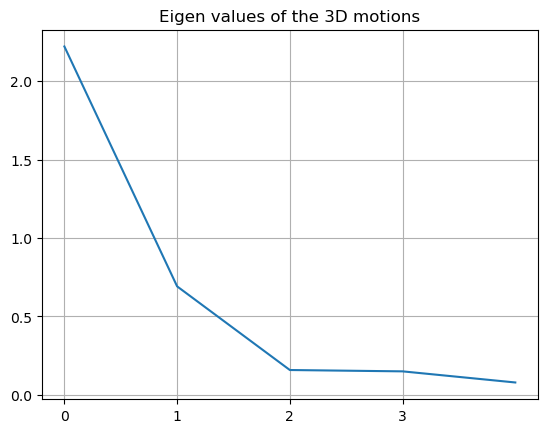

In [33]:
U1, S, VT = np.linalg.svd(X/np.sqrt((sdss_df['u'].shape[0])),full_matrices=0)
print(S)
plt.plot(S);plt.grid(True)
plt.xticks(range(0,4));plt.title('Eigen values of the 3D motions');plt.show()



[9.21069642e-01 3.93474265e-02 3.09374334e-02 8.64549797e-03
 2.33179975e-32]
minimum dimension size to explain 95% of the variance  2


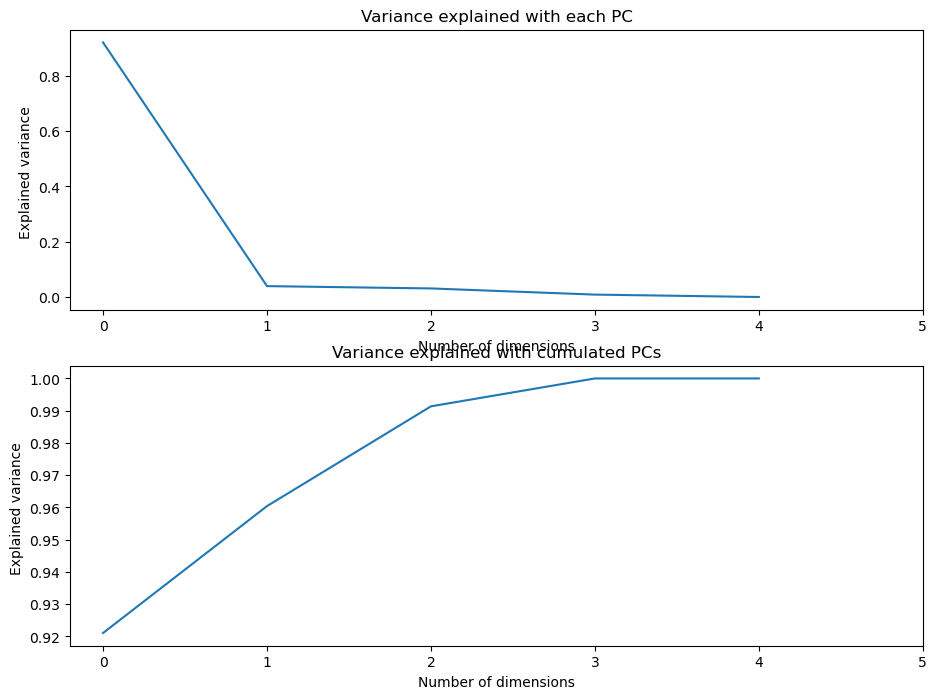

In [34]:
# The 3 PCs' explained variance ratio: how much of the variance is explained by each component
print(pca.explained_variance_ratio_)
fig,ax=plt.subplots(2,1,figsize=(11,8))
ax[0].plot(pca.explained_variance_ratio_);ax[0].set_xticks(range(0,6))
ax[0].set_xlabel('Number of dimensions')
ax[0].set_ylabel('Explained variance ')
ax[0].set_title('Variance explained with each PC')
ax[1].plot(np.cumsum(pca.explained_variance_ratio_));ax[1].set_xticks(range(0,6))
ax[1].set_xlabel('Number of dimensions')
ax[1].set_ylabel('Explained variance ')
ax[1].set_title('Variance explained with cumulated PCs')
d = np.argmax(np.cumsum(pca.explained_variance_ratio_)>=0.95) +1
print("minimum dimension size to explain 95% of the variance ",d)

We will now re-perform PCA with the number of PCs you found is most appropriate. Re-apply the fit-transform function. Update the dataframe by adding the PCA value(s) and dropping the columns of the 5 filter features.

**Task: PCA again, fit and transform, update the dataframe with the new feature(s) (3 points)**

In [35]:
# answer
pca=PCA(n_components=2).fit(X)
X_pca = pca.transform(X)
x_pca = pd.DataFrame(X_pca)
sdss_df_no_ugriz = sdss_df.drop(['u','g','r','i','z'],axis=1)
sdss_df_no_ugriz['pc1'] = x_pca[0]
sdss_df_no_ugriz['pc2'] = x_pca[1]

In [36]:
# answer
sdss_df_no_ugriz.head
sdss_df_8 = sdss_df_no_ugriz.drop(['mjd','fiberid'],axis=1)
sdss_df_8.head

<bound method NDFrame.head of               ra        dec  class  redshift  plate       pc1       pc2
0     183.598370   0.135285      2 -0.000055    323 -0.195906 -0.028545
1     183.680207   0.126185      0  0.123111    287  1.297480 -0.590112
2     183.870529   0.049911      2 -0.000111   3306 -1.446294  0.566480
3     183.883288   0.102557      2  0.000590   3306 -0.849479  1.287360
4     183.847174   0.173694      2  0.000315    324  2.873346  0.029723
...          ...        ...    ...       ...    ...       ...       ...
9994  131.316413  51.539547      0  0.027583    447  0.222815 -0.134423
9995  131.306083  51.671341      0  0.117772    447  0.258999  0.415195
9996  131.552562  51.666986      2 -0.000402   7303  1.480557  0.388659
9997  131.477151  51.753068      0  0.014019    447  1.391932  0.116927
9998  131.665012  51.805307      0  0.118417    447 -0.936304 -1.113396

[9999 rows x 7 columns]>

## 2) Machine Learning Models (26 points)

We will now train different models on this dataset. We have a total of 8 features, 3 classes, and 10,000 samples. We will use K-Nearest Neighbors, Naive Bayes, Random Forest, Support Vector Machine, Multi Layer Perceptron.

We now follow a normal machine learning workflow:
* Feature scaling (2 points)
* Train/test set split (2 points)
* Model design, training, testing (15 points)
* Model comparisons, pick your winner, discuss feature importance using Random Forest. (10 points)

### 2.1 Feature Scaling
Scaling all values to be within the (0, 1) interval will reduce the distortion due to exceptionally high values and make some algorithms converge faster. You can scale the features only by dropping the "class" column without modifying the dataframe in place, using the pandas function ``drop()``.

**Task: Scale just the features (2 points)**

In [37]:
# answer
no_labels = sdss_df_8.drop(['class'],axis=1)
new_df = (no_labels-no_labels.min())/(no_labels.max()-no_labels.min())
df_norm = pd.concat((new_df, sdss_df_8['class']), 1)

df_norm.head
#sdss_df_8.drop(['class'], axis=1)

<bound method NDFrame.head of             ra       dec  redshift     plate       pc1       pc2  class
0     0.694098  0.074642  0.000762  0.006999  0.448116  0.215274      2
1     0.694422  0.074519  0.023749  0.002579  0.518972  0.154528      0
2     0.695175  0.073487  0.000751  0.373281  0.388789  0.279639      2
3     0.695225  0.074199  0.000882  0.373281  0.417106  0.357618      2
4     0.695082  0.075162  0.000831  0.007122  0.593742  0.221577      2
...        ...       ...       ...       ...       ...       ...    ...
9994  0.487163  0.770000  0.005920  0.022225  0.467983  0.203821      0
9995  0.487122  0.771783  0.022753  0.022225  0.469700  0.263274      0
9996  0.488097  0.771724  0.000697  0.864072  0.527659  0.260404      2
9997  0.487799  0.772888  0.003388  0.022225  0.523454  0.231010      0
9998  0.488543  0.773595  0.022873  0.022225  0.412986  0.097923      0

[9999 rows x 7 columns]>

### 2.2 Test, train, validation data sets.
**Task: Split the data into a training and a test part.  (2 points)**

The models will be trained on the training data set and tested on the test data set

In [42]:
# answer
train, test = sklearn.model_selection.train_test_split(df_norm)
train_x = train.drop(['class'],axis=1)
test_x = test.drop(['class'],axis=1)

NameError: name 'sklearn' is not defined

Computation time is important to account for when scaling up the data set and the model size. You can evaluate the relative computational time using the function ``time.perf_counter()`` to evaluate the absolute time. Then compare the computational time by making the difference between two time stamps:

``t1=time.perf_counter()``

``t2=time.perf_counter()``

``tcomp = t2 - t1``

We will also assess the model performance of these multi-class classifiers. We will evaluate the average of the scores over the 3 class labels.

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score, plot_confusion_matrix, precision_score
from sklearn.model_selection import cross_val_predict
label_name = ['Star','Galaxy','Quasar']

train_y = train['class']
test_y = test['class']

NameError: name 'train' is not defined

In the following, we will be testing over several classifiers. Follow the steps:
1. model definition/design
2. training
3. prediction on test
4. evaluation: a) print the classification_report; b) save the precision, recall, fscore and accuracy in variables

### 2.3.a K Nearest Neighbors (3 points)
Check out the function arguments and definition here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [40]:
#answer
from sklearn.neighbors import KNeighborsClassifier
print("Classifying using K-nearest Neighbors")

# model design
knn = KNeighborsClassifier(n_neighbors=4)

# training
knn.fit(train_x,train_y)

# evaluation on test
pred_y = knn.predict(test_x)

# print the classification report
# save values of precision, recall, fscore, accuracy.
print(classification_report(test_y, pred_y, target_names=label_name))
knn_precision_recall_fscore = score(test_y, pred_y)
knn_accuracy = accuracy_score(test_y, pred_y)

Classifying using K-nearest Neighbors


NameError: name 'train_x' is not defined

### 2.3.b Naive Bayes (3 points)
Check out the sklearn tutorial pages here: https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes. We propose to use the Gaussian Naive Bayes.

Naive Bayes assumes the data to be normally distributed which can be achieved by scaling using the MaxAbsScaler. For this example then we will use the unscaled data, then rescale it.

In [41]:
# answer
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MaxAbsScaler
print("Classifying using Gaussian Naive Bayes")

# model design
gnb = GaussianNB()
# re-scale the data
scaler = MaxAbsScaler()
df = scaler.fit_transform(new_df)
#sdss = scaler_gnb.fit_transform(sdss_df.drop('class', axis=1))
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = sklearn.model_selection.train_test_split(df, df_norm['class'], test_size=0.33)


# training
gnb.fit(X_train_gnb, y_train_gnb)
# evaluation
pred_y = gnb.predict(X_test_gnb)
# evaluation: 
# print the classification report
# save values of precision, recall, fscore, accuracy.
print(classification_report(y_test_gnb, pred_y, target_names=label_name))
gnb_precision_recall_fscore = score(y_test_gnb, pred_y)
gnb_accuracy = accuracy_score(y_test_gnb, pred_y)

Classifying using Gaussian Naive Bayes


NameError: name 'sklearn' is not defined

### 2.3.c Random Forest Classifier (2 points)
Check out the tutorial page here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
# answer
from sklearn.ensemble import RandomForestClassifier
print("Classifying using Random Forest Classifiers")

X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0, random_state=0, shuffle=False)
# model design
clf = RandomForestClassifier(max_depth=2, random_state=0)
# training
clf.fit(X, y)
RandomForestClassifier(...)

# evaluation
print(clf.predict([[0, 0, 0, 0]]))

# evaluation: 
# print the classification report
# save values of precision, recall, fscore, accuracy.

print(classification_report(y_test, y, target_names=label_name))
clf_precision_recall_fscore = score(y_test, y)
clf_accuracy = accuracy_score(y_test, pred_y)

### 2.3.d Support Vector Machine Classifier (2 points)
Check out the sklearn information page here: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [ ]:
# answer
from sklearn.svm import SVC
print("Classifying using Support Vector Machine Classfiers")

# model design
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# training
clf.fit(X_train_clf, pred_y)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])
# evaluation
print(clf.predict([[-0.8, -1]]))
# evaluation: 
# print the classification report

# save values of precision, recall, fscore, accuracy.

print(classification_report(y, pred_y, target_names=label_name))
clf_precision_recall_fscore = score(y_test, pred_y)
clf_accuracy = accuracy_score(y_test, pred_y)

### 2.3.e Multi-Layer Perceptron (3 points)

Check out the information page here: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [ ]:
# answer
from sklearn.neural_network import MLPClassifier
print("Classifying using Multi Layer Perceptron Classifier")
X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

# model design
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
# training
clf.predict_proba(X_test[:1])
array([[0.038..., 0.961...]])
clf.predict(X_test[:5, :])
array([1, 0, 1, 0, 1])
# evaluation
clf.score(X_test, y_test)
# evaluation: 
# print the classification report
# save values of precision, recall, fscore, accuracy.
print(classification_report(y_test, y_train, target_names=label_name))
clf_precision_recall_fscore = score(y_test, y_train)
clf_accuracy = accuracy_score(y_test, y_train)


### 2.4 Model performance and comparison 

### 2.4.a Confusion Matrix and interpretation

**Task: Plot the confusion matrix (2 points)**

Use the sklearn function ``plot_confusion_matrix``. Find help here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html. We tested 5 models, make suplots, set the title on each subplots.


In [ ]:
# plot the confusion matrix
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()


**Task: Comment on what you see the best classifier is likely to be (1 point).** You can also comment on the misclassification and confusion rates.

Naive Bayes appeared to be the best classifier.

### 2.4.a K Fold Cross Validation
We will now perform k fold cross valdiation for the classifiers. We use the function ``cross_val_score`` on each ewstimator, on the training set, with 10 folds, and use accuracy as a score metric.

**Task: perform the cross validation over K folds, output the mean and standard deviation of the accuracy (3 points)**

In [ ]:
from sklearn.model_selection import cross_val_score
# print("K-nearest neighbors Mean:", scores_knn.mean(),"Standard Deviation:", scores_knn.std())

**Task: Which method won the Xval test (1 point) ?**

see the cell below

<!-- answer here -->





### 2.4.c And the winner is ...

Let's compare the results. 
**Task: Create a pandas dataframe with all of the performance metrics, including the results from K-fold cross validation. (2 points)**

In [ ]:
# create data frame
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 'Random Forest', 'SVC','ANN'],
    'Accuracy': [,,,,,],
    'Precision': [, , , ,],
    'Recall': [, ,, ,],
    'Fscore': [, ,, ,],
    'Kfold_accuracy_mean': [,,,,,],
    'Kfold_accuracy_std': [,,,,,]})
# sort values by the Fscore with the greatest value first.

**Task: Comment on the accuracy and performance and choose a winner. (1 point)**

see the cell below

<!-- answer here -->






## 3 Summary (4 points)

### 3.1 Feature Importance using Random Forest Classifier

Decision Trees have the unique property of being able to order features by their ability to split between the classes. If some features dominate over other in the predictive power of classes, one can further reduce the dimension of the features for additional analysis. The vector of feature importance is the module ``rfc.feature_importances_``, sorted with ascending importance. Store the vector of importance .

**Task: plot a bar plot using the function ``matplotlib.pyplot.bar``. (2 points)**

In [ ]:
# answer
# vector of importance
# vector of features



**Task: What are the top three features (1 point)?**

enter in the cell below

<!-- answer -->

In this notebook, you have learned that redshift was the best predictor of what object you are observing. Now, did you actualy need to do this all to find this out? Probably not if you were an astrophysicist! But hey, we are not. So great job!

**Task: Briefly comment on what you have learned (1 point)**

see the cell below

This assignment taught me about how to go through the whole process in order to create final products and it taught me to think about how to figure out which model system would be best given what you are working on.

## Bonus questions (5 points)


Perform hyperparameter tuning and ensemble learning to improve on the classification performance.

In [ ]:
# answer below

<!-- answer -->